In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## Check WEAVE wavelength grid

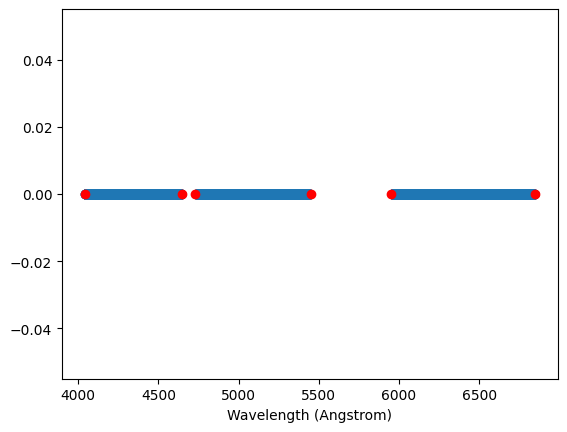

In [2]:
wave_grid_arms = np.load('../grids/weave_hr_wavegrid_arms.npy')
plt.scatter(wave_grid_arms, np.zeros(len(wave_grid_arms)))
plt.scatter([4040,4650, 4730, 5450, 5950, 6850], np.zeros(6), color='red')
plt.xlabel('Wavelength (Angstrom)')
plt.show()

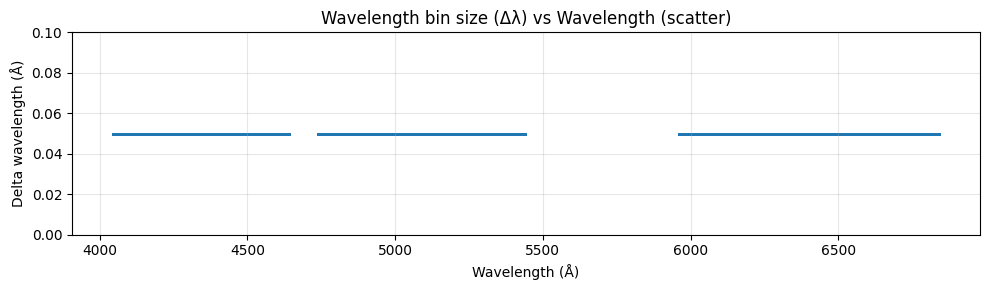

In [4]:
# Compute bin sizes (difference between consecutive wavelength points)
delta = np.diff(wave_grid_arms)
wavelength_mid = wave_grid_arms[:-1]  # use left edges (or midpoints if preferred)

plt.figure(figsize=(10,3))
plt.scatter(wavelength_mid, delta, s=1, alpha=0.6)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Delta wavelength (Å)')
plt.title('Wavelength bin size (Δλ) vs Wavelength (scatter)')
plt.grid(alpha=0.3)
plt.ylim(0, 0.1)
plt.tight_layout()
plt.show()

In [5]:
delta

array([0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05], shape=(43479,))

# Load Golden Sample data

## FITS File Contents

This is a **WEAVE Golden Sample** catalog file containing spectroscopic data from the WEAVE multi-object spectrograph survey.

- **Format**: FITS binary table extension
- **Rows**: 11,012 observations
- **Columns**: 73 data fields

### Data Categories

| Category | Columns | Description |
|----------|---------|-------------|
| **Observation Info** | `OBID`, `NAME`, `MODE`, `FILENB_1/2`, `CAMERA_1/2` | Observation IDs, file numbers, and camera settings |
| **Target Info** | `TARGID`, `CNAME`, `TARGSRVY`, `TARGPROG` | Target identifiers and survey/program names |
| **Coordinates** | `TARGRA`, `TARGDEC` | Right Ascension and Declination |
| **Photometry** | `MAG_G`, `MAG_R`, `MAG_I`, `MAG_GG`, `MAG_BP`, `MAG_RP` | Magnitudes in various bands (Gaia, etc.) |
| **Observation Quality** | `RMS_ARC1/2`, `WAVE_COR1/2`, `SNR_CASU`, `RESOL`, `AIRMASS`, `SEEING` | Wavelength calibration, signal-to-noise, resolution |
| **SNR by Band** | `SNR_blue_QAG`, `SNR_green_QAG`, `SNR_red_QAG` | Quality assessment group SNR per arm |
| **RVS Parameters** | `VRAD_RVS`, `TEFF_RVS`, `LOGG_RVS`, `FEH_RVS`, `ALPHA_RVS` + errors | Stellar parameters from RVS analysis |
| **FERRE Parameters** | `TEFF_FERRE`, `LOGG_FERRE`, `FEH_FERRE`, `ALPHA_FERRE`, `MICRO_FERRE` + errors | Stellar parameters from FERRE analysis |
| **Input Parameters** | `TEFF_INPUT`, `LOGG_INPUT`, `MH_INPUT`, `ALPHA_INPUT`, `VRAD_INPUT` | Reference/input stellar parameters |

### Key Stellar Parameters
- **Teff**: Effective temperature
- **logg**: Surface gravity  
- **[Fe/H]**: Metallicity
- **[α/Fe]**: Alpha element abundance
- **Vrad**: Radial velocity
- **RESOL**: Spectral resolution (R)

In [6]:
hdu = fits.open('../GA-QAG_OPR3bv3_MasterTableCodev4_GoldenSample_RELEASE.fits', memmap=True)
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  624 / width of table in bytes                        
NAXIS2  =                11012 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   73 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'OBID    '           / label for column 1                             
TFORM1  = 'K       '           / format for column 1                            
TTYPE2  = 'NAME    '           / label for column 2                             
TFORM2  = '18A     '        

In [7]:
hdu.info()

Filename: ../GA-QAG_OPR3bv3_MasterTableCodev4_GoldenSample_RELEASE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  Joined        1 BinTableHDU    158   11012R x 73C   [K, 18A, 7A, 5A, K, 7A, 9A, 7A, 8A, 8A, K, 30A, 20A, I, I, 15A, 15A, D, D, E, E, E, E, E, E, D, D, D, D, D, D, E, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 43A, D, D, D, D, E]   


In [8]:
hdu[0].header

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    0 / No image, just extensions                      
EXTEND  =                    T / There are standard extensions                  
COMMENT Dummy header; see following table extension                             

In [9]:
# Load data into a table and filter for high resolution (R = 20,000)
data = hdu[1].data

# Get the RESOL column
resol = data['RESOL']

# Filter for high resolution (R ~ 20,000)
high_res_mask = resol >= 20000
n_high_res = np.sum(high_res_mask)

print(f"Total number of observations: {len(data)}")
print(f"Number of high resolution (R >= 20,000) observations: {n_high_res}")
print(f"Percentage: {100 * n_high_res / len(data):.2f}%")

# Show the distribution of RESOL values
print(f"\nRESOL statistics:")
print(f"  Min: {np.nanmin(resol):.4f}")
print(f"  Max: {np.nanmax(resol):.4f}")
print(f"  Mean: {np.nanmean(resol):.4f}")
print(f"  Unique values: {np.unique(resol[~np.isnan(resol)])}")

Total number of observations: 11012
Number of high resolution (R >= 20,000) observations: 0
Percentage: 0.00%

RESOL statistics:
  Min: 0.2350
  Max: 1.0318
  Mean: 0.7144
  Unique values: [0.23503831 0.23506497 0.23534134 ... 1.0215176  1.0215924  1.0318289 ]


In [10]:
# Get the RESOL column
# Get the MODE column and filter entries not 'LOWRES'
mode = data['MODE']
non_lowres_mask = mode != 'LOWRES'
n_non_lowres = np.sum(non_lowres_mask)
print(f"Number of non-LOWRES entries: {n_non_lowres}")
print("Unique MODEs (non-LOWRES):", np.unique(mode[non_lowres_mask]))

print(f"\nRESOL statistics:")
print(f"  Min: {np.nanmin(resol[non_lowres_mask]):.4f}")
print(f"  Max: {np.nanmax(resol[non_lowres_mask]):.4f}")
print(f"  Mean: {np.nanmean(resol[non_lowres_mask]):.4f}")

Number of non-LOWRES entries: 3956
Unique MODEs (non-LOWRES): ['HIGHRES']

RESOL statistics:
  Min: 0.2350
  Max: 0.3419
  Mean: 0.2717
